<a href="https://colab.research.google.com/github/waseda-ken/git-python-basic/blob/main/_%E7%A2%BA%E8%A8%BC%E7%9A%84%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.random.seed(0)
array_x=np.random.normal(size=100)
np.mean(array_x)

0.059808015534485

In [ ]:
list_x = [5, 7, 1, 4, 2, 6, 3]
a = len(list_x)
print(a)


7


In [ ]:
#1.仮説を立てる
#2.有意水準を決める
#3.P値を決める
#4.判定

In [ ]:
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 31.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
#データの読み込み

In [ ]:
df=pd.read_csv('/content/sample_01.csv')
df

,No,販促前,販促後
0,初台店,69,73
1,代々木店,81,82
2,幡ヶ谷店,64,68
3,笹塚店,79,81
4,西原店,64,72
5,渋谷店,110,114
6,松濤店,72,73
7,千駄ヶ谷店,92,94
8,広尾店,83,88
9,神宮前店,78,82


In [ ]:
df.mean(numeric_only=True)


,0
販促前,79.2
販促後,82.7


In [ ]:
#分布の確認

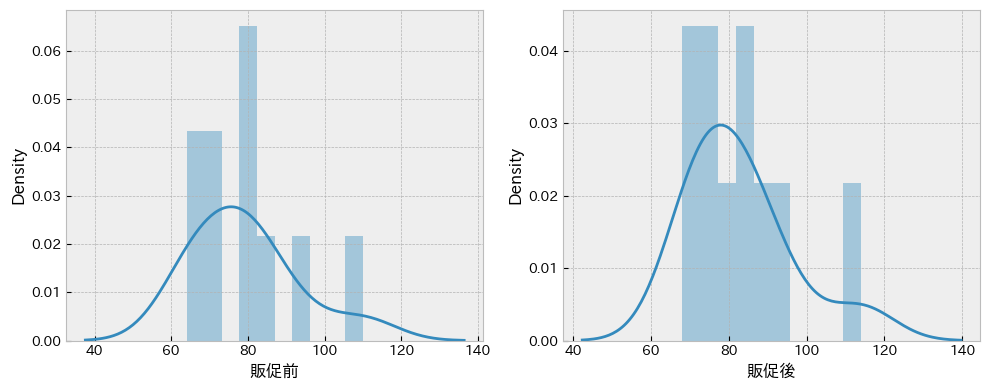

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['販促前'], bins=10)
plt.subplot(1, 2, 2)
sns.distplot(df['販促後'], bins=10)
plt.tight_layout()

In [ ]:
#正規性の検定
#シャピロ・ウィルク検定(S-W 検定): サンプルサイズが小さい場合
#コルモゴロフ・スミルノフ検定(K-S 検定): サンプルサイズが大きい場合（1000 以上など)

#帰無仮説：正規分布である
#対立仮説：正規分布でない

In [ ]:
static, pvalue = stats.shapiro(df["販促前"])
pvalue

np.float64(0.23636421308763145)

In [ ]:
static, pvalue = stats.shapiro(df['販促後'])
pvalue

np.float64(0.10092648547532646)

シャピロ・ウィルク検定とコルモゴロフ・スミルノフ検定は、以下のように仮説を立てています。

帰無仮説： 正規分布である

対立仮説： 正規分布でない

つまり、P 値が 0.05 を上回れば正規分布を仮定でき、そうでなければ仮定できません。
今回は、 P 値が 0.05 を上回っているので、正規分布を仮定します。

In [ ]:
stats.ttest_rel(df['販促前'], df['販促後'])

TtestResult(statistic=np.float64(-5.217491947499509), pvalue=np.float64(0.0005510378621158206), df=np.int64(9))

今回は、P 値が 0.05 を下回り、帰無仮説を棄却できたため、統計的に平均の際には有意な差があると示すことができ、販促前と販促後には差があるとなります。つまり、販促の効果はあったといえます。

In [ ]:
df = pd.read_csv('sample_02.csv')
df

,No,新宿エリア,渋谷エリア
0,1,440,325
1,2,480,934
2,3,525,458
3,4,691,982
4,5,737,340
5,6,725,340
6,7,734,382
7,8,502,820
8,9,763,963
9,10,973,673


In [ ]:
df.mean(numeric_only=True)

,0
No,5.5
新宿エリア,657.0
渋谷エリア,621.7


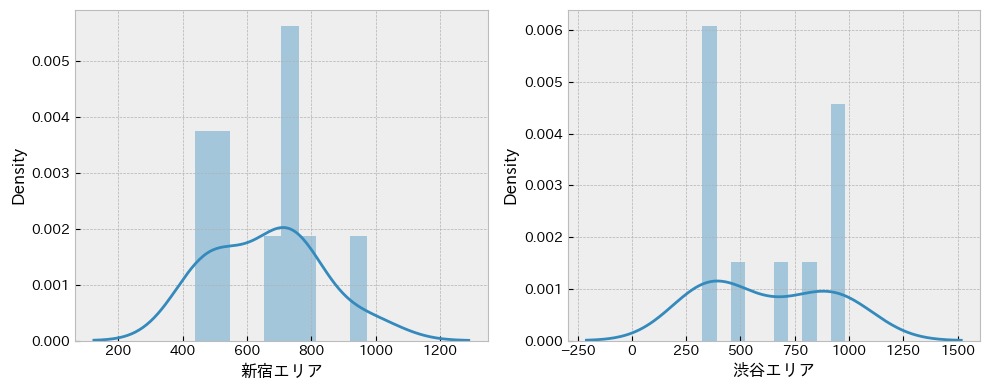

In [ ]:
# 分布の確認
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['新宿エリア'], bins=10)
plt.subplot(1, 2, 2)
sns.distplot(df['渋谷エリア'], bins=10)
plt.tight_layout()

In [ ]:
# 正規性の確認
stats.shapiro(df['渋谷エリア'])

ShapiroResult(statistic=np.float64(0.8306179681923478), pvalue=np.float64(0.03403911861532855))

① 仮説を立てる

帰無仮説（H_0）: 2 群間の平均値に差がない
対立仮説（H_1）: 2 群間の平均値に差がある

② 有意水準を決める

今回は有意水準を 5% とします。

③ p 値を計算する
今回は以下のような条件になっています。

2 群間にはデータの対応が無い
正規分布が仮定できない（ノンパラメトリック）

p値
0.570...>0.05

判定
帰無仮説を棄却できない

In [ ]:
# Mann-Whitney(マンホイットニー)のU検定
stats.mannwhitneyu(df['新宿エリア'], df['渋谷エリア'], alternative='two-sided')

MannwhitneyuResult(statistic=np.float64(58.0), pvalue=np.float64(0.570605503511469))

【問題設定 3】  
A さんはある学校で教師をしています。     
ある日、校内のクラス A とクラス B の英語の点数について、  
ランダムに 10 名ずつ抽出し平均を比べてみました。  
平均は、クラス A とクラス B に差があるようでした。  
ここには統計的に見ても同様に意味のある差でしょうか。

In [ ]:
df = pd.read_csv('sample_03.csv')
df

,クラスA,クラスB
0,34,56
1,40,78
2,43,86
3,60,67
4,66,66
5,63,81
6,61,57
7,40,69
8,70,88
9,87,67


In [ ]:
# 代表値の確認（平均）
df.mean()

,0
クラスA,56.4
クラスB,71.5


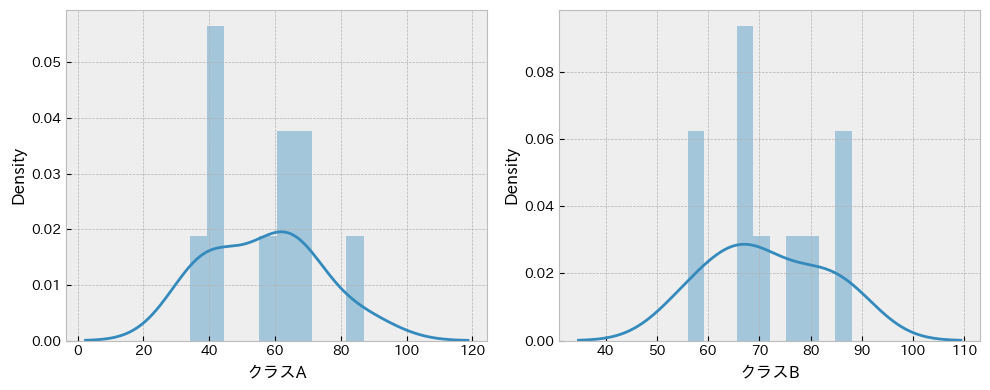

In [ ]:
# 分布の確認
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['クラスA'], bins=10)
plt.subplot(1, 2, 2)
sns.distplot(df['クラスB'], bins=10)
plt.tight_layout()

In [ ]:
# 正規性の確認
stats.shapiro(df['クラスA']) #正規性を仮定

ShapiroResult(statistic=np.float64(0.9310208818973753), pvalue=np.float64(0.45800856500824677))

In [ ]:
# 正規性の確認
stats.shapiro(df['クラスB']) #正規性を仮定

ShapiroResult(statistic=np.float64(0.9270759599190649), pvalue=np.float64(0.4197549573098248))

-分散が等しいかどうかを検定(F検定)

帰無仮説：すべての群に対し母分散が等しい
対立仮説：いずれかの母分散が異なる

バートレット検定

先述したとおり分散の検定には F 検定がありますが、Scipy にはこれがないため、代わりにバートレット検定を使用します。

In [ ]:
stats.bartlett(df['クラスA'], df['クラスB'])

BartlettResult(statistic=np.float64(1.288219203548453), pvalue=np.float64(0.2563763882769976))

① 仮説を立てる

帰無仮説（H_0）: 2 群間の平均値に差がない
対立仮説（H_1）: 2 群間の平均値に差がある

② 有意水準を決める

今回は有意水準を 5% とします。

③ p 値を計算する

今回は以下のような条件になっています。

2 群間にはデータの対応が無い

正規分布が仮定できる（パラメトリック）
等分散を仮定する
今回は対応がなく、等分散を仮定します。

0.029...<0.05

帰無仮説を棄却する

In [ ]:
#スチューデントのt検定
stats.ttest_ind(df['クラスA'], df['クラスB'], equal_var=True) #ind:independent

TtestResult(statistic=np.float64(-2.370168982305104), pvalue=np.float64(0.029155056786197644), df=np.float64(18.0))

In [ ]:
def ftest(asample, bsample):
    a_var = np.var(asample, ddof=1)  # Aの不偏分散
    b_var = np.var(bsample, ddof=1)  # Bの不偏分散
    a_df = len(asample) - 1  # Aの自由度
    b_df = len(bsample) - 1  # Bの自由度
    f = a_var / b_var  # F比の値

    one_sided_pval1 = stats.f.cdf(f, a_df, b_df)  # 片側検定のp値 1
    one_sided_pval2 = stats.f.sf(f, a_df, b_df)   # 片側検定のp値 2
    two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値

    print('F:       ', f)
    print('p-value: ', two_sided_pval)


χ二乗検定は次の手順で行います。

仮説を設定する

期待度数を求める

実測度数と期待度数からχ二乗値を算出

 χ二乗値から P 値を算出する

 ・仮説立て

 　　ー帰無仮説（H_0）: 2 群間は独立
 　　ー対立仮説（H_1）: 2 群間は独立ではない

【問題設定 4】  
あるスーパーでは、夕方以降、男性の利用客が増える傾向があります。      
系列店では、あるサンドイッチが男性客に売れた実績があるため、  
自店でもサンドイッチの品揃えの比率の変更を検討しています。  

データに基づいた判断をすべく、簡単なアンケートを作り実施しました。  
対象は、男性女性、合計 50 人、
「サラダサンド」と「ハムサンド」でどちらのサンドイッチを好むかを集計しています。
サラダサンド/ハムサンドの好みに性別差があると言えるでしょうか。

In [ ]:
# データの読み込み
df = pd.read_csv('sample_04.csv')
df.head(3)

,性別,サンドイッチ
0,男性,ハムサンド
1,女性,サラダサンド
2,男性,ハムサンド


#クロス集計を行う

In [ ]:
crosstab = pd.crosstab(df['性別'], df['サンドイッチ'])
crosstab

サンドイッチ,サラダサンド,ハムサンド
性別,,
女性,14,14
男性,12,10


① 仮説を立てる

帰無仮説（H_0）：二つの変数は独立である。

対立仮説（H_1）：二つの変数は独立ではない（何らかの関連がある。）

② 有意水準を決める

今回は有意水準を 5% とします。

③ p 値を計算する

0.74...>0.05

④判定

帰無仮説を棄却することができない

In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:0.10198135198135216
p 値:0.7494647665797038
自由度:1


In [ ]:
# 期待度数
print(ef)

[[14.56 13.44]
 [11.44 10.56]]
